This notebook displays the implementation of the Logistic Regression algorithm using various types of models, like plain and Neural Networks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]

data = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1').drop(["Date", "Holiday", "Seasons"], axis=1)

data.columns = dataset_cols

data.head

<bound method NDFrame.head of       bike_count  hour  temp  humidity  wind  visibility  dew_pt_temp  \
0            254     0  -5.2        37   2.2        2000        -17.6   
1            204     1  -5.5        38   0.8        2000        -17.6   
2            173     2  -6.0        39   1.0        2000        -17.7   
3            107     3  -6.2        40   0.9        2000        -17.6   
4             78     4  -6.0        36   2.3        2000        -18.6   
...          ...   ...   ...       ...   ...         ...          ...   
8755        1003    19   4.2        34   2.6        1894        -10.3   
8756         764    20   3.4        37   2.3        2000         -9.9   
8757         694    21   2.6        39   0.3        1968         -9.9   
8758         712    22   2.1        41   1.0        1859         -9.8   
8759         584    23   1.9        43   1.3        1909         -9.3   

      radiation  rain  snow functional  
0           0.0   0.0   0.0        Yes  
1          

In [3]:
data["functional"] = (data["functional"] == "Yes").astype(int)

data = data[data["hour"] == 12]

data = data.drop(["hour"], axis=1)

data.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


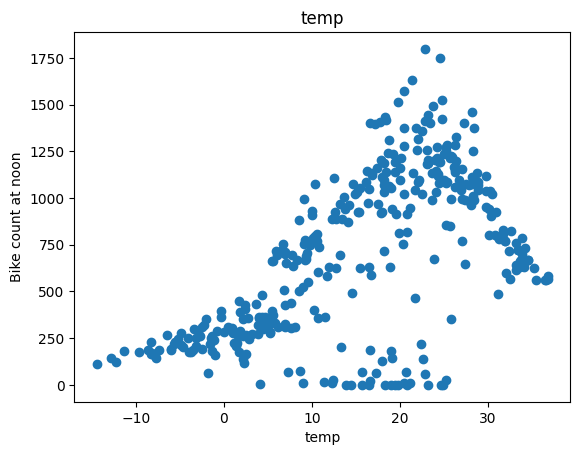

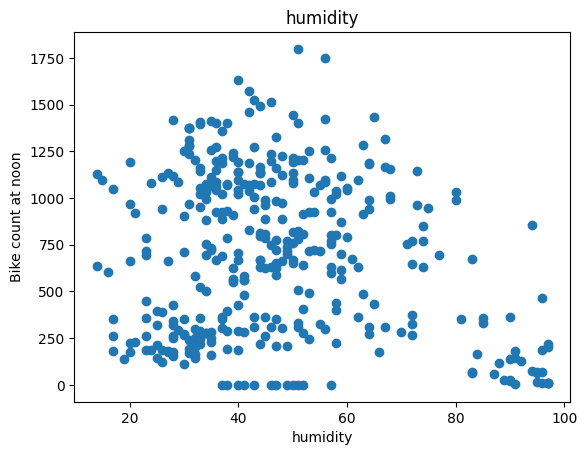

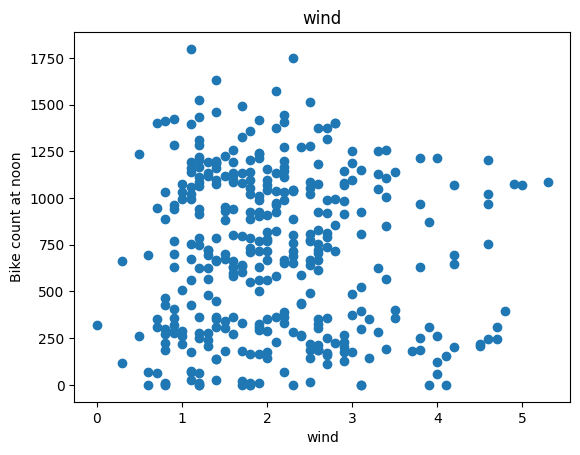

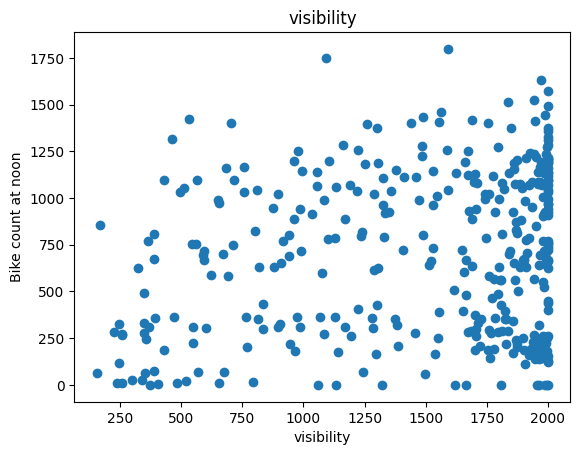

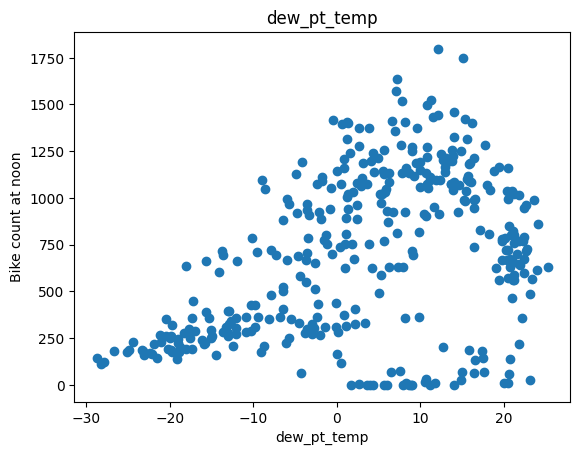

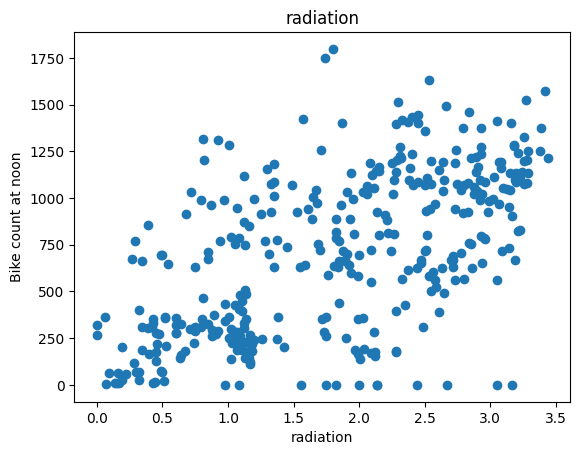

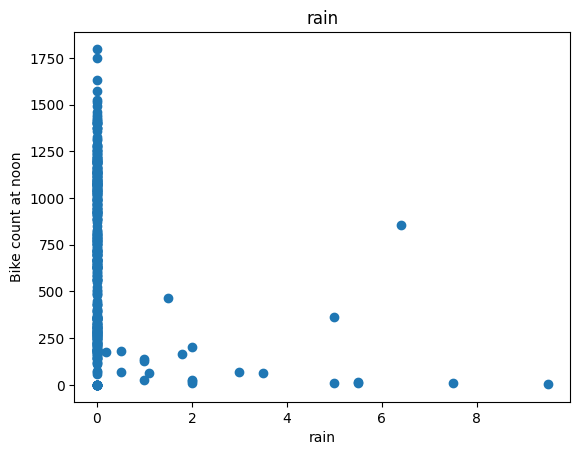

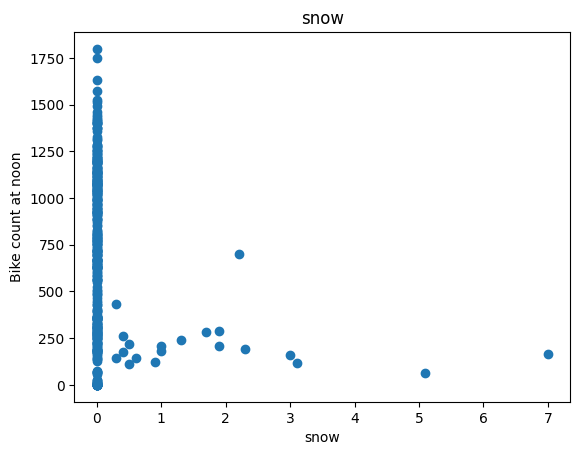

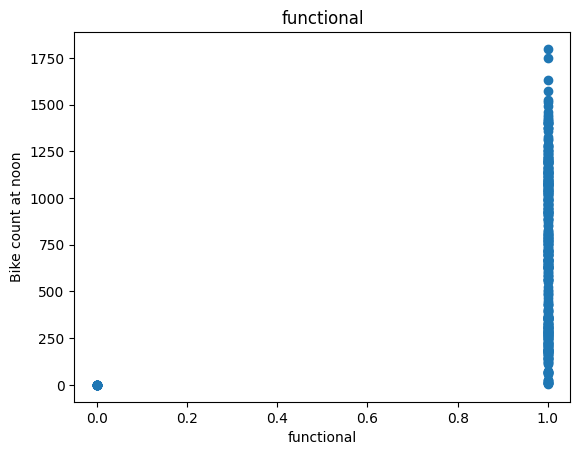

In [4]:
for label in data.columns[1:]:

    plt.scatter(data[label], data["bike_count"])
    plt.title(label)
    plt.ylabel("Bike count at noon")
    plt.xlabel(label)
    plt.show()

In [5]:
data = data.drop(["wind", "visibility", "functional"], axis=1)

data.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


Splitting the dataset into training, validation and testing dataset

In [6]:
train, val, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])

C:\Users\malha\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
# Function to get X and Y

def get_xy(dataframe, y_label, x_labels=None):

    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    Y = dataframe[y_label].values.reshape(-1, 1)

    data = np.hstack((X, Y))

    return data, X, Y

Note:

Moving further, the word 'temp' indicates that only 'temperature' column is being considered as the feature. Whereas, the word 'all' indicates that all the columns are being considered as features.

In [8]:
_, X_train_temp, Y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])

_, X_valid_temp, Y_valid_temp = get_xy(val, "bike_count", x_labels=["temp"])

_, X_test_temp, Y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [9]:
# X_train_temp

Creating a Linear Regression Model

Creating the First Model: temp_reg

In [10]:
temp_reg = LinearRegression()

temp_reg.fit(X_train_temp, Y_train_temp)

LinearRegression()

In [11]:
print(temp_reg.coef_, temp_reg.intercept_)

[[22.47854647]] [383.91686826]


In [12]:
temp_reg.score(X_test_temp, Y_test_temp)

0.22918303490754444

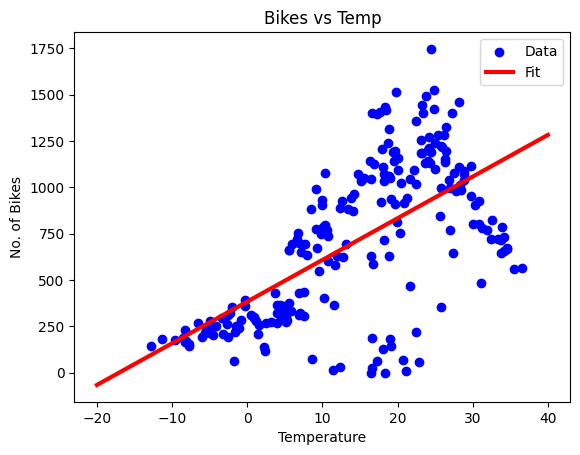

In [13]:
def just_plot(model):
    plt.scatter(X_train_temp, Y_train_temp, label="Data", color="blue")
    x = tf.linspace(-20, 40, 100)
    plt.plot(x, model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
    plt.legend()
    plt.title("Bikes vs Temp")
    plt.ylabel("No. of Bikes")
    plt.xlabel("Temperature")
    plt.show()

just_plot(temp_reg)

Multiple Linear Regression

In [14]:
_, X_train_all, Y_train_all = get_xy(train, "bike_count", x_labels=data.columns[1:])

_, X_valid_all, Y_valid_all = get_xy(val, "bike_count", x_labels=data.columns[1:])

_, X_test_all, Y_test_all = get_xy(test, "bike_count", x_labels=data.columns[1:])

Linear Regression Model for all

Creating the second Model: all_reg

In [15]:
all_reg = LinearRegression()

all_reg.fit(X_train_all, Y_train_all)

LinearRegression()

In [16]:
all_reg.score(X_test_all, Y_test_all)

0.3397657359170171

Regression with a Neural Network (having only a single node) using Tensorflow

In [18]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [19]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)

temp_normalizer.adapt(X_train_temp.reshape(-1))

Creating the third model: temp_nn_model

In [20]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [21]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [22]:
temp_history = temp_nn_model.fit(
    X_train_temp.reshape(-1), Y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_valid_temp, Y_valid_temp)
)

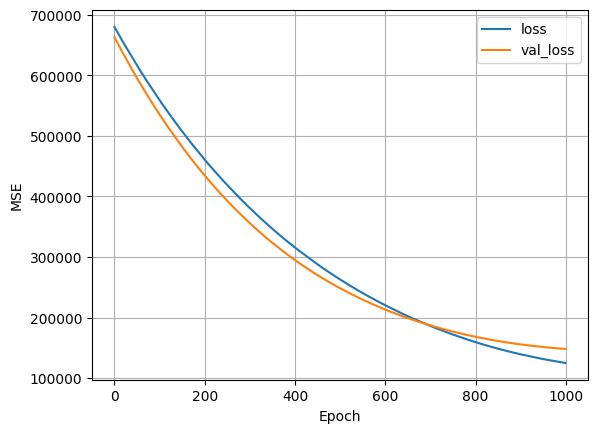

In [23]:
plot_loss(temp_history)

4/4 [==============================] - 0s 2ms/step


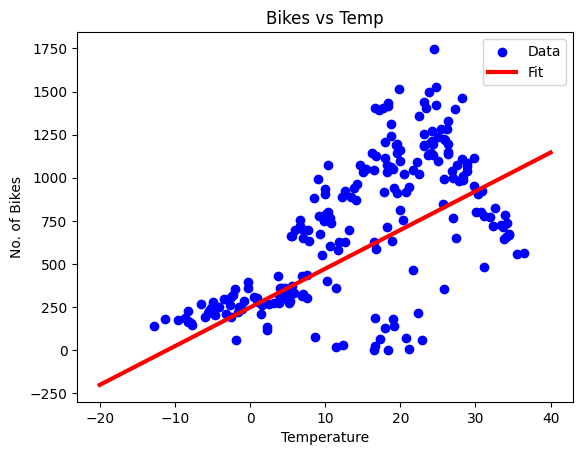

In [24]:
just_plot(temp_nn_model)

Using a full Neural Network

Creating the fourth model: actual_nn_model

In [25]:
# This is the actual Neural Network consisting of multiple layers having multiple nodes

temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)

temp_normalizer.adapt(X_train_temp.reshape(-1))

actual_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

actual_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [26]:
actual_history = actual_nn_model.fit(
    X_train_temp, Y_train_temp,
    validation_data=(X_valid_temp, Y_valid_temp),
    verbose=0,
    epochs=100
)

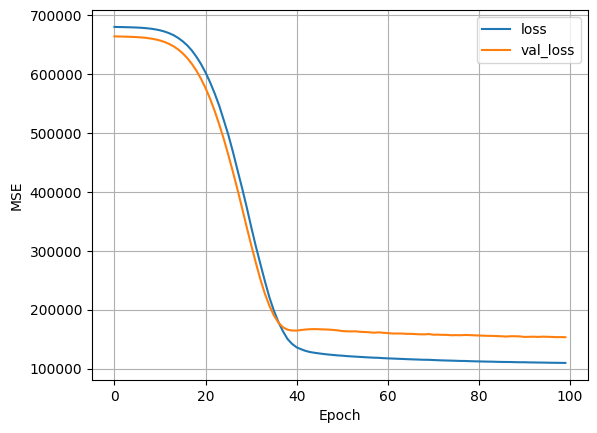

In [27]:
plot_loss(actual_history)

4/4 [==============================] - 0s 3ms/step


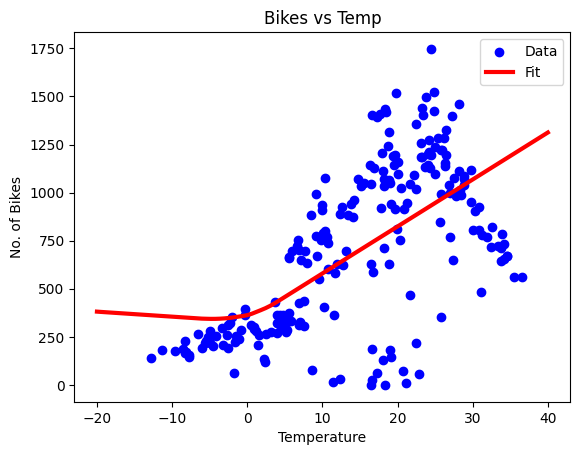

In [28]:
just_plot(actual_nn_model)

As you can see, the similar graphs are being plotted.

In [44]:
# Neural Network for all the columns

all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)

all_normalizer.adapt(X_train_all)

Creating the fifth model: all_nn_model

In [45]:
all_nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [46]:
all_history = all_nn_model.fit(
    X_train_all, Y_train_all,
    validation_data=(X_valid_all, Y_valid_all),
    verbose=0,
    epochs=100
)

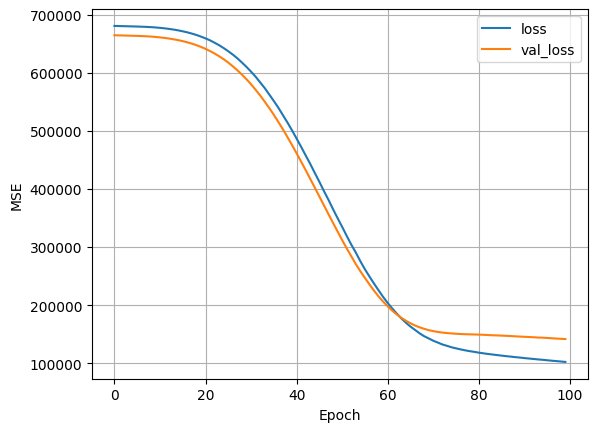

In [47]:
plot_loss(all_history)

In [48]:
# Measuring the mean-squared-error

y_pred_all_reg = all_reg.predict(X_test_all)
y_pred_all_nn = all_nn_model.predict(X_test_all)

3/3 [==============================] - 0s 3ms/step


In [49]:
def MSE(y_pred, y_real):
    mse = (np.square(y_pred - y_real)).mean()
    return mse

In [50]:
MSE(y_pred_all_reg, Y_test_all)

134086.75739919068

In [51]:
MSE(y_pred_all_nn, Y_test_all)

143769.8113759911

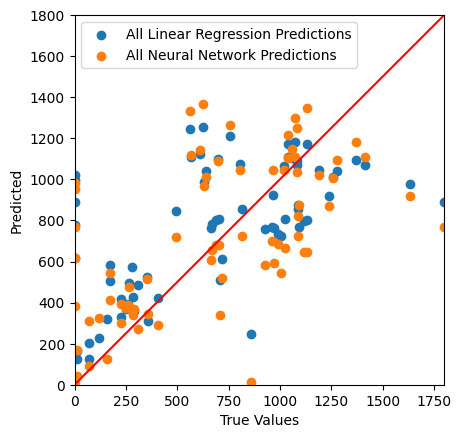

In [55]:
ax = plt.axes(aspect="equal")
plt.scatter(Y_test_all, y_pred_all_reg, label="All Linear Regression Predictions")
plt.scatter(Y_test_all, y_pred_all_nn, label="All Neural Network Predictions")
plt.xlabel("True Values")
plt.ylabel("Predicted")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")

Names of the models made:

--> temp_reg,
--> all_reg,
--> temp_nn_model,
--> actual_nn_model,
--> all_nn_model